# 1. Import necessary modules

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_log_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 2. Data Exploration

## Train Data

In [2]:
train_data = pd.read_csv('train.csv')
train_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12975,2012-06-29 20:00:00,3,0,1,1,37.72,44.695,42.0,16.9979,53,255,308
12976,2012-06-29 21:00:00,3,0,1,2,35.26,41.665,53.0,12.9980,41,195,236
12977,2012-06-29 22:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,34,129,163
12978,2012-06-29 23:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,6,42,48


In [3]:
train_data.duplicated().sum()

0

In [4]:
train_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12980 entries, 0 to 12979
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    12980 non-null  object 
 1   season      12980 non-null  int64  
 2   holiday     12980 non-null  int64  
 3   workingday  12980 non-null  int64  
 4   weather     12980 non-null  int64  
 5   temp        12980 non-null  float64
 6   atemp       12980 non-null  float64
 7   humidity    12980 non-null  float64
 8   windspeed   12980 non-null  float64
 9   casual      12980 non-null  int64  
 10  registered  12980 non-null  int64  
 11  count       12980 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 1.2+ MB


In [7]:
train_data['season'].value_counts()

season
2    4409
1    3980
3    2457
4    2134
Name: count, dtype: int64

In [8]:
train_data['holiday'].value_counts()

holiday
0    12623
1      357
Name: count, dtype: int64

In [9]:
train_data['weather'].value_counts()

weather
1    8576
2    3273
3    1128
4       3
Name: count, dtype: int64

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

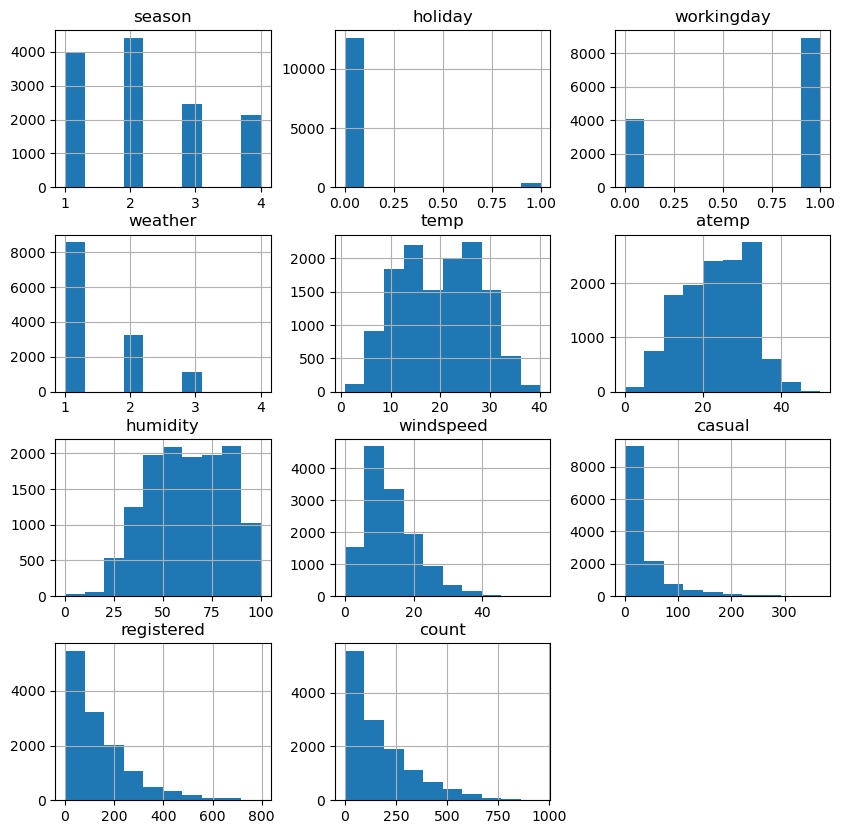

In [10]:
train_data.hist(figsize=(10,10))

## Test Data

In [11]:
test_data = pd.read_csv('test.csv')
test_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7
...,...,...,...,...,...,...,...,...,...,...,...
4394,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60.0,11.0014,11,108
4395,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60.0,11.0014,8,81
4396,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60.0,11.0014,7,83
4397,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56.0,8.9981,13,48


In [12]:
test_data.duplicated().sum()

0

In [13]:
test_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

In [14]:
test_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
count,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000
mean,3.357809,0.032507,0.673108,1.421232,22.297513,25.784351,63.797909,11.540867,45.220050,208.819277
std,0.766335,0.177363,0.469131,0.613338,7.775455,8.400126,17.118806,7.680410,55.364112,187.367255
min,1.000000,0.000000,0.000000,1.000000,5.740000,7.575000,16.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,1.000000,14.760000,18.180000,50.000000,7.001500,6.000000,49.000000
50%,3.000000,0.000000,1.000000,1.000000,22.960000,26.515000,65.000000,11.001400,25.000000,171.000000
75%,4.000000,0.000000,1.000000,2.000000,28.700000,32.575000,78.000000,16.997900,67.000000,303.000000
max,4.000000,1.000000,1.000000,3.000000,41.000000,45.455000,100.000000,43.998900,362.000000,886.000000


In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4399 entries, 0 to 4398
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    4399 non-null   object 
 1   season      4399 non-null   int64  
 2   holiday     4399 non-null   int64  
 3   workingday  4399 non-null   int64  
 4   weather     4399 non-null   int64  
 5   temp        4399 non-null   float64
 6   atemp       4399 non-null   float64
 7   humidity    4399 non-null   float64
 8   windspeed   4399 non-null   float64
 9   casual      4399 non-null   int64  
 10  registered  4399 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 378.2+ KB


# 3. Data Preprocessing

## Feature Extraction

In [16]:
# Converting datetime Column
train_data['datetime'] = pd.to_datetime(train_data['datetime'])
test_data['datetime'] = pd.to_datetime(test_data['datetime'])

# Extract date-time features
for df in [train_data, test_data]:
    df['hour'] = df['datetime'].dt.hour
    df['day'] = df['datetime'].dt.day
    df['month'] = df['datetime'].dt.month
    df['year'] = df['datetime'].dt.year
    df['dayofweek'] = df['datetime'].dt.dayofweek


In [17]:
train_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16,0,1,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40,1,1,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32,2,1,1,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13,3,1,1,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1,4,1,1,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12975,2012-06-29 20:00:00,3,0,1,1,37.72,44.695,42.0,16.9979,53,255,308,20,29,6,2012,4
12976,2012-06-29 21:00:00,3,0,1,2,35.26,41.665,53.0,12.9980,41,195,236,21,29,6,2012,4
12977,2012-06-29 22:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,34,129,163,22,29,6,2012,4
12978,2012-06-29 23:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,6,42,48,23,29,6,2012,4


In [45]:
test_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,hour,day,month,year,dayofweek
0,2012-06-30 01:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55,1,30,6,2012,5
1,2012-06-30 02:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54,2,30,6,2012,5
2,2012-06-30 03:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20,3,30,6,2012,5
3,2012-06-30 04:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15,4,30,6,2012,5
4,2012-06-30 05:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7,5,30,6,2012,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60.0,11.0014,11,108,19,31,12,2012,0
4395,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60.0,11.0014,8,81,20,31,12,2012,0
4396,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60.0,11.0014,7,83,21,31,12,2012,0
4397,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56.0,8.9981,13,48,22,31,12,2012,0


In [18]:
# Features and target variable
X_train = train_data[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour', 'day', 'month', 'year', 'dayofweek']]
y_train = train_data['count']

X_test = test_data[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour', 'day', 'month', 'year', 'dayofweek']]


# 4. Training and Evaluateing Models

## Linear Regression:

In [19]:
# Train Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = model_lr.predict(X_test)
y_pred_lr

array([145.56596371, 153.46026051, 160.32587246, ..., 229.81940615,
       245.39577786, 237.86922655])

## Random Forest Regressor:

In [20]:
# Train Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = model_rf.predict(X_test)
y_pred_rf

array([ 89.73,  72.79,  38.64, ..., 119.7 , 100.32,  57.34])

## Gradient Boosting Regressor:

In [21]:
# Train Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

# Predict on test data
y_pred_gb = model_gb.predict(X_test)
y_pred_gb

array([ -2.52378671,  26.12998308,  24.63019369, ..., 153.56581669,
       110.50486998,  78.14099013])

## Optimizing model’s parameters using Grid Search or Random Search.
## Hyperparameter Tuning

In [22]:
# It helps improve the performance of model by finding the optimal settings for its parameters
# It avoid's Overfitting and Underfitting
# Tuning these parameters can lead to more effective learning and better predictions

# Example Grid Search for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_log_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_depth': 20, 'n_estimators': 100}


# 5.Visualizing Data

In [23]:
# Assuming 'train_data' is your DataFrame with bike rental counts
skewness = skew(train_data['count'])
print(f"Skewness of bike rental counts: {skewness}")


Skewness of bike rental counts: 1.29362483396535


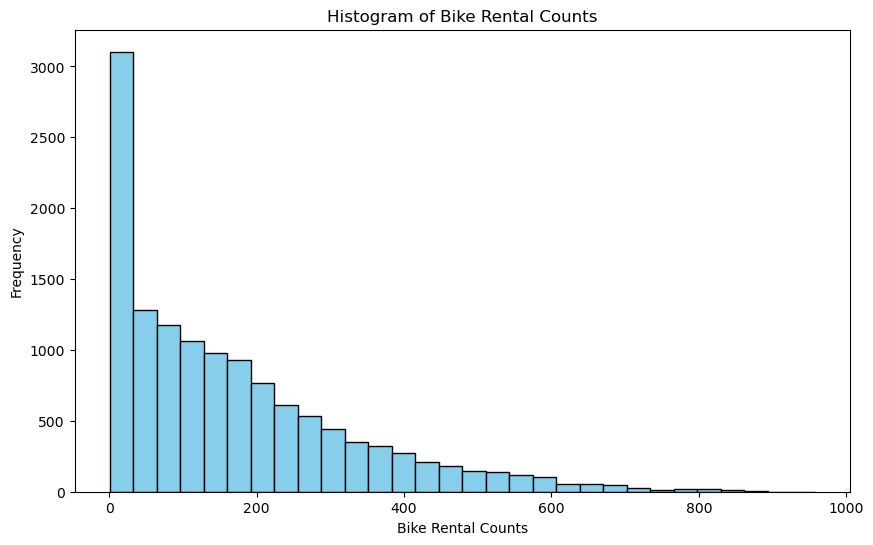

In [24]:
# Assuming 'train_data' is your DataFrame with the 'count' column
plt.figure(figsize=(10, 6))
plt.hist(train_data['count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Bike Rental Counts')
plt.xlabel('Bike Rental Counts')
plt.ylabel('Frequency')
plt.show()


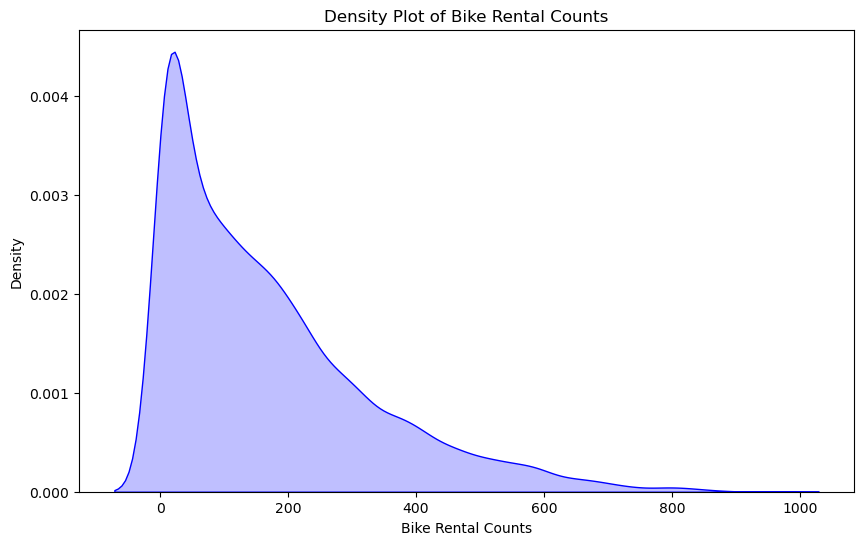

In [25]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train_data['count'], shade=True, color='blue')
plt.title('Density Plot of Bike Rental Counts')
plt.xlabel('Bike Rental Counts')
plt.ylabel('Density')
plt.show()


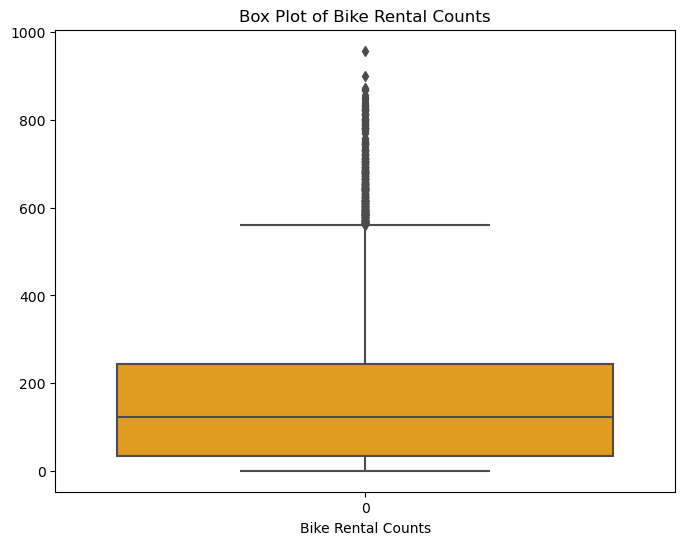

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(train_data['count'], color='orange')
plt.title('Box Plot of Bike Rental Counts')
plt.xlabel('Bike Rental Counts')
plt.show()


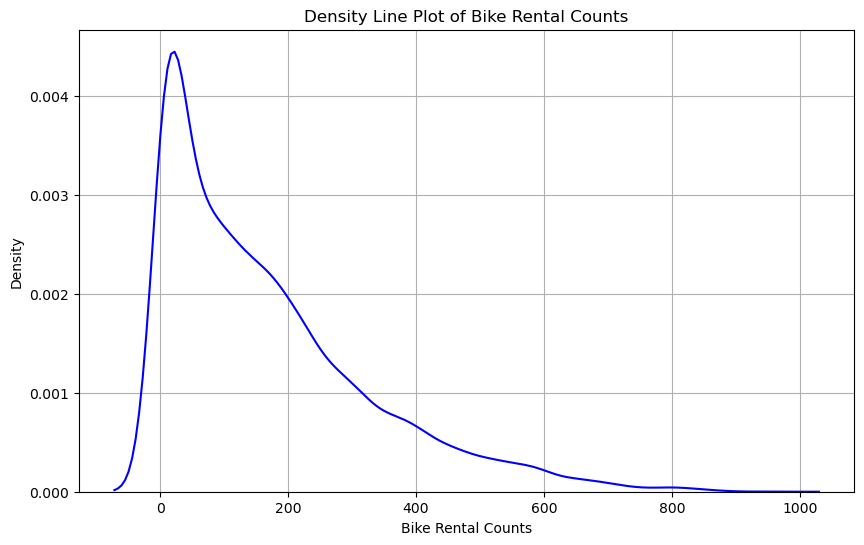

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train_data['count'], color='blue')  # Density line plot
plt.title('Density Line Plot of Bike Rental Counts')
plt.xlabel('Bike Rental Counts')
plt.ylabel('Density')
plt.grid(True)
plt.show()


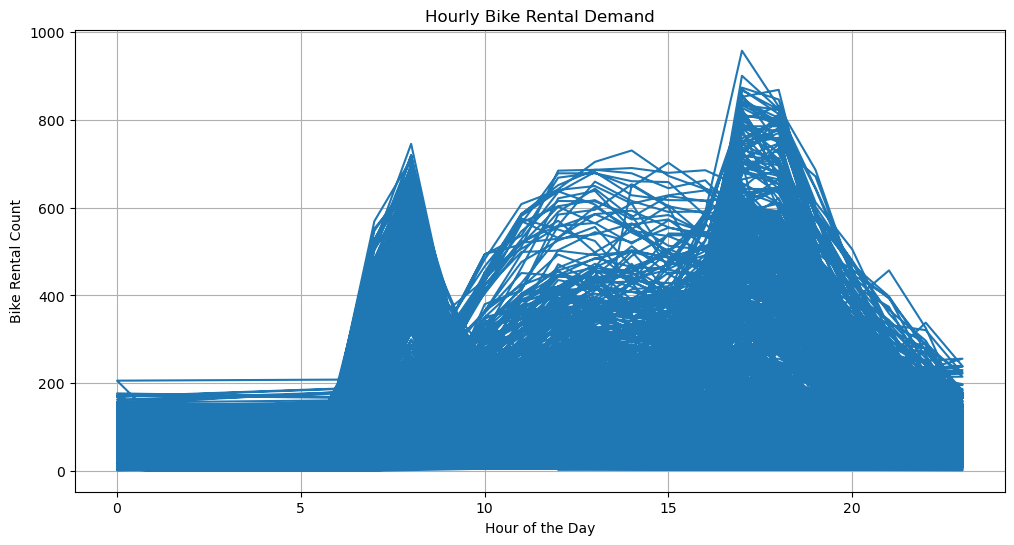

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['hour'], train_data['count'])
plt.xlabel('Hour of the Day')
plt.ylabel('Bike Rental Count')
plt.title('Hourly Bike Rental Demand')
plt.grid(True)
plt.show()


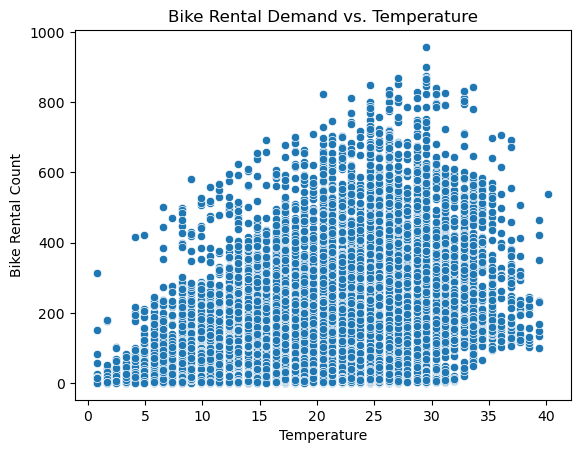

In [29]:
sns.scatterplot(x='temp', y='count', data=train_data)
plt.xlabel('Temperature')
plt.ylabel('Bike Rental Count')
plt.title('Bike Rental Demand vs. Temperature')
plt.show()


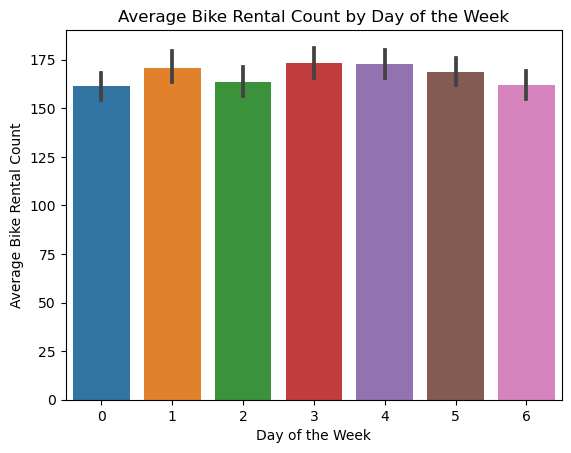

In [30]:
sns.barplot(x='dayofweek', y='count', data=train_data, estimator='mean')
plt.xlabel('Day of the Week')
plt.ylabel('Average Bike Rental Count')
plt.title('Average Bike Rental Count by Day of the Week')
plt.show()


In [31]:
train_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16,0,1,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40,1,1,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32,2,1,1,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13,3,1,1,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1,4,1,1,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12975,2012-06-29 20:00:00,3,0,1,1,37.72,44.695,42.0,16.9979,53,255,308,20,29,6,2012,4
12976,2012-06-29 21:00:00,3,0,1,2,35.26,41.665,53.0,12.9980,41,195,236,21,29,6,2012,4
12977,2012-06-29 22:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,34,129,163,22,29,6,2012,4
12978,2012-06-29 23:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,6,42,48,23,29,6,2012,4


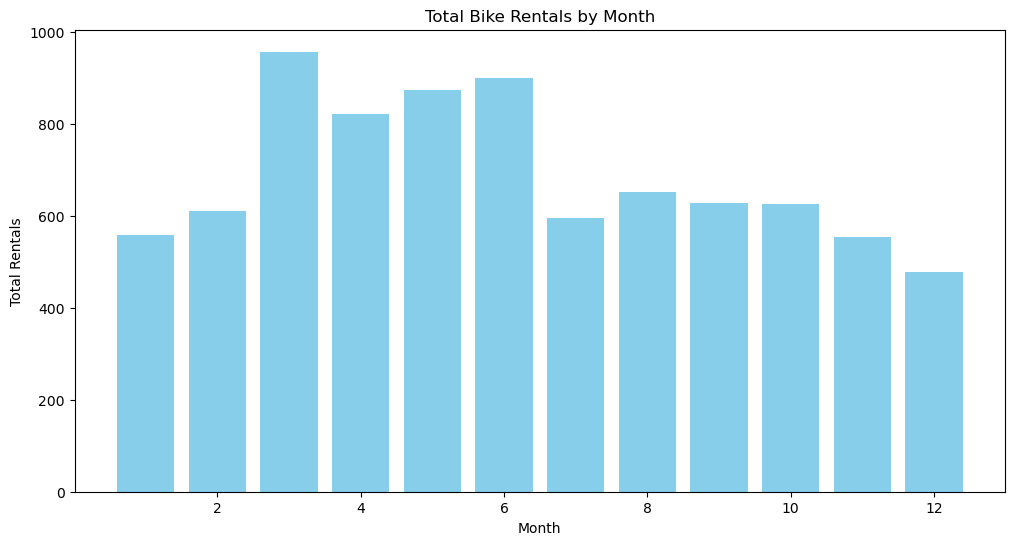

In [32]:
# Plot total rentals by month
plt.figure(figsize=(12, 6))
plt.bar(train_data['month'], train_data['count'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Month')
plt.show()

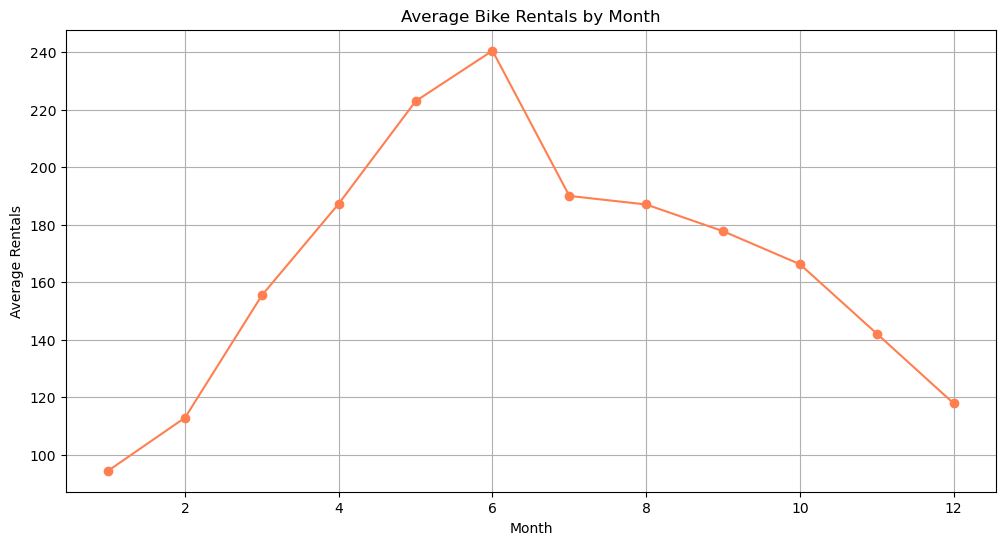

In [33]:
# Group by month and calculate the average rentals
monthly_avg_rentals = train_data.groupby('month')['count'].mean()

# Plot average rentals by month
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_rentals.index, monthly_avg_rentals.values, marker='o', linestyle='-', color='coral')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.title('Average Bike Rentals by Month')
plt.grid(True)
plt.show()

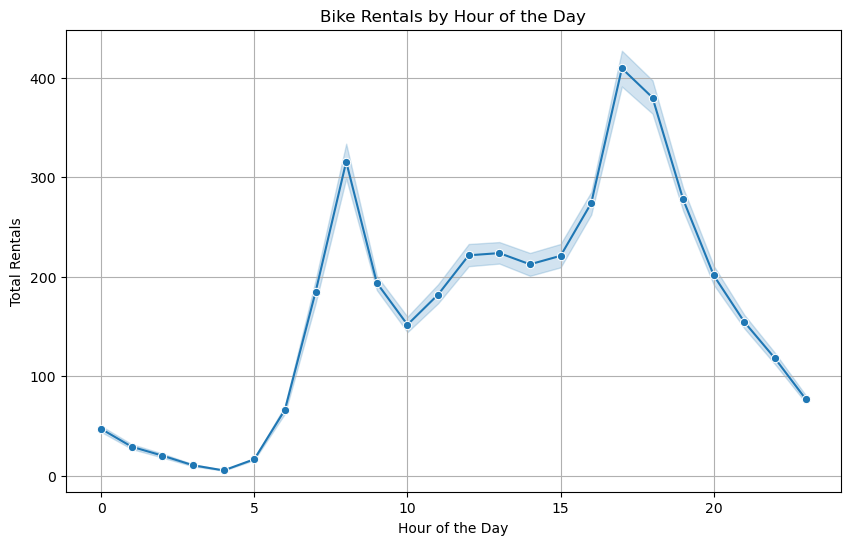

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_data, x='hour', y='count', marker='o')
plt.title('Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()


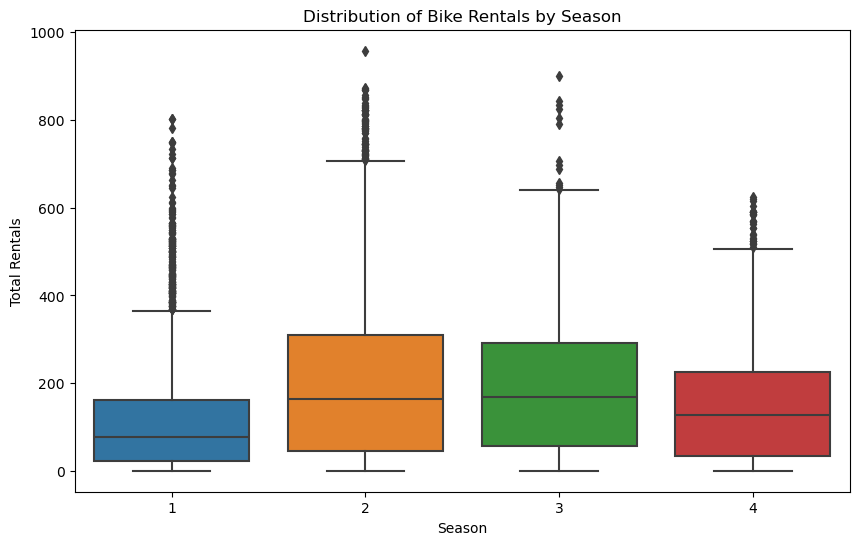

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='season', y='count')
plt.title('Distribution of Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()


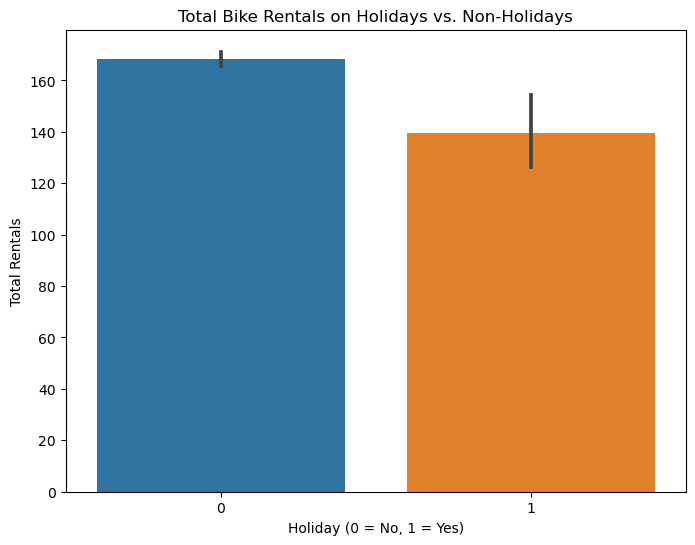

In [36]:
plt.figure(figsize=(8, 6))
sns.barplot(data=train_data, x='holiday', y='count')
plt.title('Total Bike Rentals on Holidays vs. Non-Holidays')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Total Rentals')
plt.show()


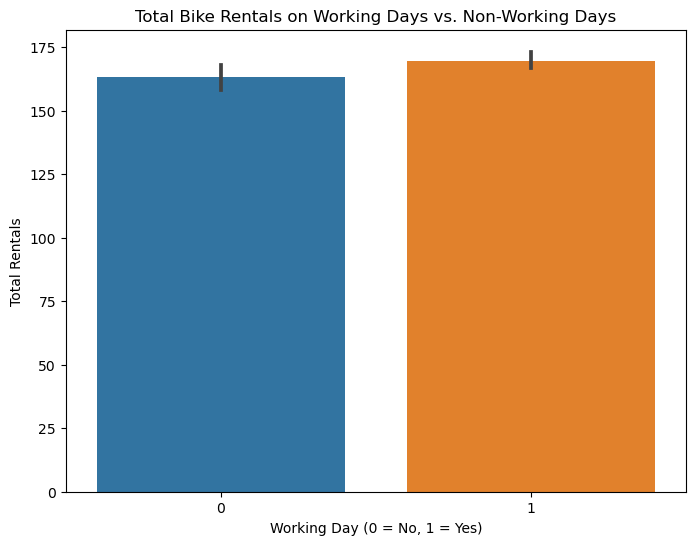

In [37]:
plt.figure(figsize=(8, 6))
sns.barplot(data=train_data, x='workingday', y='count')
plt.title('Total Bike Rentals on Working Days vs. Non-Working Days')
plt.xlabel('Working Day (0 = No, 1 = Yes)')
plt.ylabel('Total Rentals')
plt.show()


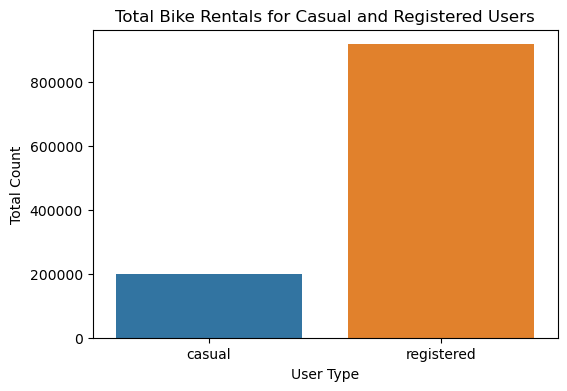

In [38]:
df_long = df.melt(id_vars='datetime', value_vars=['casual', 'registered'], var_name='type', value_name='count')

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(data=df_long, x='type', y='count', estimator='sum', ci=None)
plt.title('Total Bike Rentals for Casual and Registered Users')
plt.xlabel('User Type')
plt.ylabel('Total Count')
plt.show()

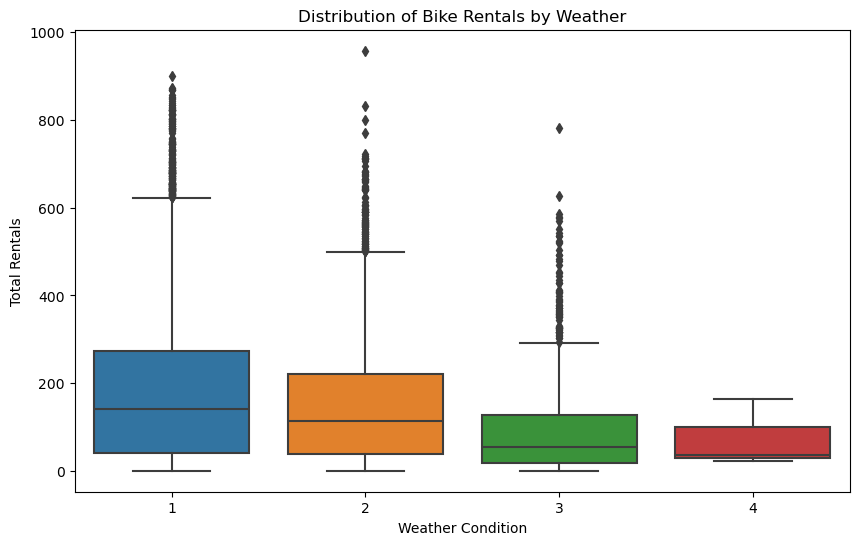

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='weather', y='count')
plt.title('Distribution of Bike Rentals by Weather')
plt.xlabel('Weather Condition')
plt.ylabel('Total Rentals')
plt.show()


In [40]:
train_data['season'].value_counts()

season
2    4409
1    3980
3    2457
4    2134
Name: count, dtype: int64

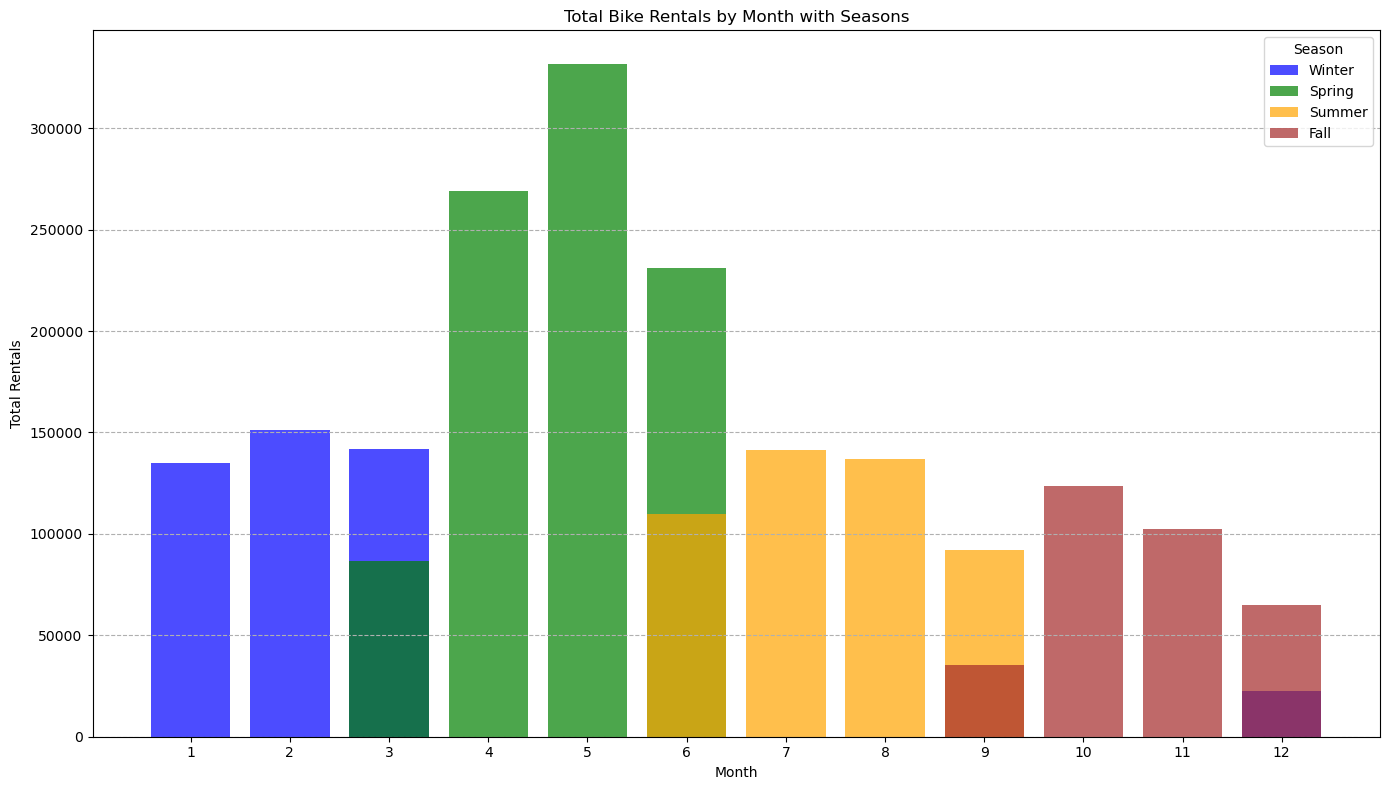

In [41]:
# Define colors for seasons and ensure labels are strings
colors = {1: 'blue', 2: 'green', 3: 'orange', 4: 'brown'}
season_labels = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}

# Ensure month is treated as a category and sort by month
train_data['month'] = pd.Categorical(train_data['month'], categories=range(1, 13), ordered=True)

# Plot total rentals by month with seasonal highlights
plt.figure(figsize=(14, 8))

for season, color in colors.items():
    monthly_data = train_data[train_data['season'] == season].groupby('month')['count'].sum().reindex(range(1, 13))
    plt.bar(monthly_data.index.astype(str), monthly_data.values, color=color, label=season_labels[season], alpha=0.7)

plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Month with Seasons')
plt.legend(title='Season')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


# 6. Evaluating Model Performance

In [42]:

# RMSLE(Skewed Data)
# Root Mean Squared Logarithmic Error 
# Custom RMSLE Scorer with Clipping
def rmsle(y_true, y_pred):
    y_pred = np.maximum(y_pred, 0)  # Replace negative values with zero
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# Initialize models
model_lr = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Performing cross-validation and calculate RMSLE for each model
cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5, scoring=rmsle_scorer)
cv_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5, scoring=rmsle_scorer)
cv_scores_gb = cross_val_score(model_gb, X_train, y_train, cv=5, scoring=rmsle_scorer)

# Calculate mean RMSLE for each model
mean_rmsle_lr = -cv_scores_lr.mean()  # Cross-validation returns negative values for scoring
mean_rmsle_rf = -cv_scores_rf.mean()
mean_rmsle_gb = -cv_scores_gb.mean()

print(f"Mean RMSLE for Linear Regression: {mean_rmsle_lr:.4f}")
print(f"Mean RMSLE for Random Forest Regressor: {mean_rmsle_rf:.4f}")
print(f"Mean RMSLE for Gradient Boosting Regressor: {mean_rmsle_gb:.4f}")


Mean RMSLE for Linear Regression: 1.3198
Mean RMSLE for Random Forest Regressor: 0.4945
Mean RMSLE for Gradient Boosting Regressor: 0.7545


# 7. Preparing Final Model

In [43]:
# Final Model Training
final_rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
final_rf_model.fit(X_train, y_train)

# Make Predictions on Test Data
y_pred_test = final_rf_model.predict(X_test)

# Ensure no negative values (if any)
y_pred_test = np.maximum(y_pred_test, 0)
y_pred_test = np.round(y_pred_test).astype(int)  # Round and convert to integer

In [44]:
# Creating final DataFrame with proper predictions of RandomForestRegressor 

final_df = pd.DataFrame({'datetime': test_data['datetime'], 'count': y_pred_test})
final_df.to_csv('bike_rental_predictions.csv', index=False)
